#### Problem Statement-
Bike-sharing system are meant to rent the bicycle and return to the different place for the bike sharing purpose in Washington DC.

You are provided with rental data spanding for 2 years. You must **predict** the **total count of bikes rented during each hour** covered by the test set, using only information available prior to the rental period.

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
# to show the figures in the jupyter notebook itself
%matplotlib inline 

In [2]:
train = pd.read_csv('train_bikes.csv', parse_dates=['datetime']) # loading the training data

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:

train.tail() # looking at the training data from end


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [5]:
train.holiday.unique()

array([0, 1])

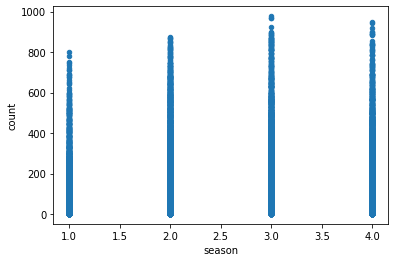

In [6]:
train.plot.scatter(x = 'season', y = 'count') # plotting the counts based on the season

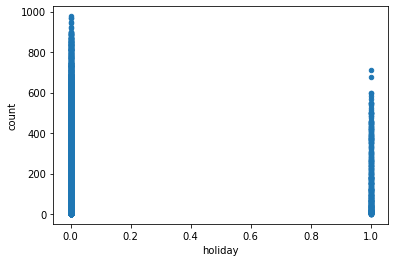

In [7]:
train.plot.scatter(x = 'holiday', y = 'count') # plotting the counts based on the holidays

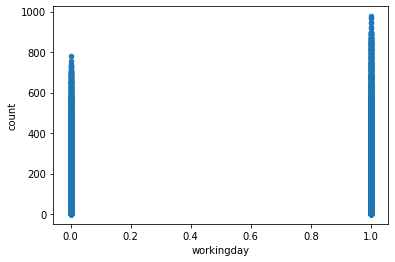

In [8]:
train.plot.scatter(x = 'workingday', y = 'count') # plotting the counts based on working day

In [9]:
train.weather.unique()

array([1, 2, 3, 4])

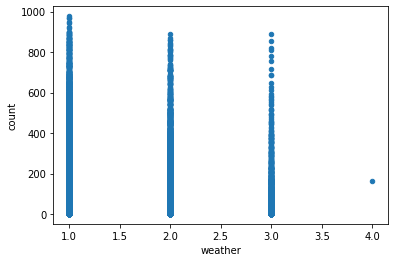

In [10]:
train.plot.scatter(x = 'weather', y = 'count') # plotting the counts based on the weather

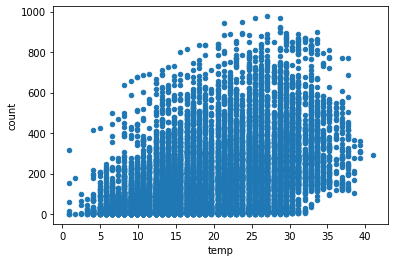

In [11]:
train.plot.scatter(x = 'temp', y = 'count') # plotting the counts based on the temparature

In [12]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


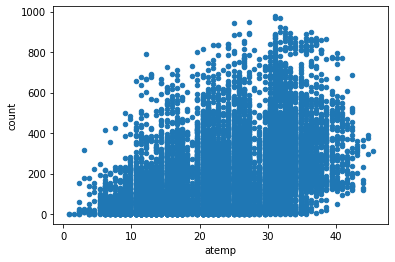

In [13]:
train.plot.scatter(x = 'atemp', y = 'count') # plotting the counts based on atemp

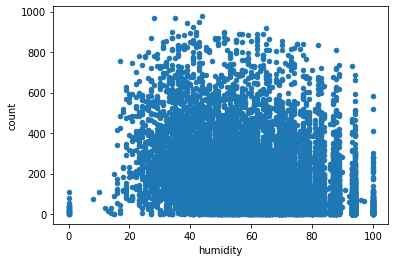

In [14]:
train.plot.scatter(x = 'humidity', y = 'count')# plotting the counts based on humidity

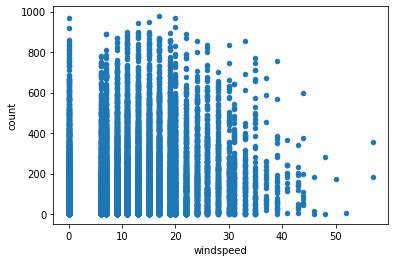

In [15]:
train.plot.scatter(x = 'windspeed', y = 'count') # plotting the counts based on windspeed

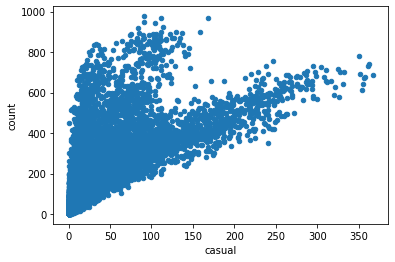

In [16]:
train.plot.scatter(x = 'casual', y = 'count')# plotting the counts based casual user

In [17]:

train.info() # observing the data types of the columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [18]:
train.describe() # Generate descriptive statistics that summarize the central tendency,dispersion and shape of a dataset's distribution

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [19]:
test = pd.read_csv('test_bikes.csv') # loading the test data

In [20]:
test.head()  #looking at the 1st 5 rows of the test data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [21]:
test.tail() # last 5 rows of the test data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981
6492,2012-12-31 23:00:00,1,0,1,1,10.66,13.635,65,8.9981


In [22]:
test.info() # observing the data types of the columns for test data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [23]:
test.describe() # Generate descriptive statistics that summarize the central tendency,dispersion and shape of a dataset's distribution for test data

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
std,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600


In [24]:
# installing the pandas profiling library. It is used for a deeper understanding than the normal Dataframe.describe() method
!pip install pandas-profiling

     |████████████████████████████████| 259 kB 343 kB/s eta 0:00:01
     |████████████████████████████████| 58 kB 189 kB/s eta 0:00:01
     |████████████████████████████████| 610 kB 732 kB/s eta 0:00:01
     |████████████████████████████████| 63 kB 92 kB/s  eta 0:00:01
     |████████████████████████████████| 59 kB 413 kB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 235 kB/s eta 0:00:01
     |████████████████████████████████| 12.4 MB 127 kB/s eta 0:00:01
     |████████████████████████████████| 10.0 MB 463 kB/s eta 0:00:01    |██████████████████████▍         | 7.0 MB 526 kB/s eta 0:00:06
     |████████████████████████████████| 291 kB 532 kB/s eta 0:00:01


  Created wheel for confuse: filename=confuse-1.1.0-py3-none-any.whl size=17573 sha256=2ad76dfb6b059ddab47485ff3071ba1314d9562e6cf856e5697107e8c6cc586d
  Stored in directory: /home/akash/.cache/pip/wheels/18/e0/b3/79594ba4a96afaf41d39916ed83ce7d5ec031874c66a76eabb
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27084 sha256=5bb50e3a3ac963eee96be06c44dc6bd71b915277866aebdbd84ed186b88184a2
  Stored in directory: /home/akash/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291990 sha256=27550d1f9387cbb39ee3d632b0fdfa2ee6797c5d98e8adea41ddcf0d75150f88
  Stored in directory: /home/akash/.cache/pip/wheels/16/72/b0/e5be34699908d9ff25dcb3debbb717987b766af61bbddffdfe
Successfully built confuse htmlmin imagehash
  Attempting uninstall: requests
    Found existing installation: requests 2.22.0
    Uninstalling requests-2.22.0:
      Successfully uninstalled req

In [25]:
import pandas_profiling

In [28]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [30]:
train[['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered']].profile_report()

/home/akash/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [25]:
print("count samples & features: ", train.shape) # printing the number of rows and columns
print("Are there missing values: ", train.isnull().values.any()) # printing if dataset has any NaN value


count samples & features:  (10886, 12)
Are there missing values:  False


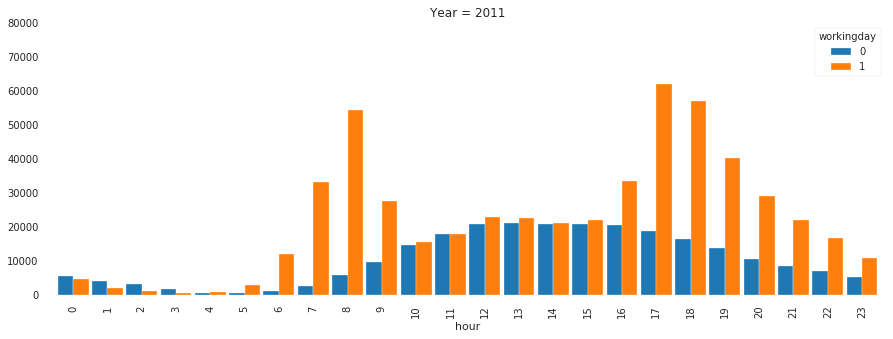

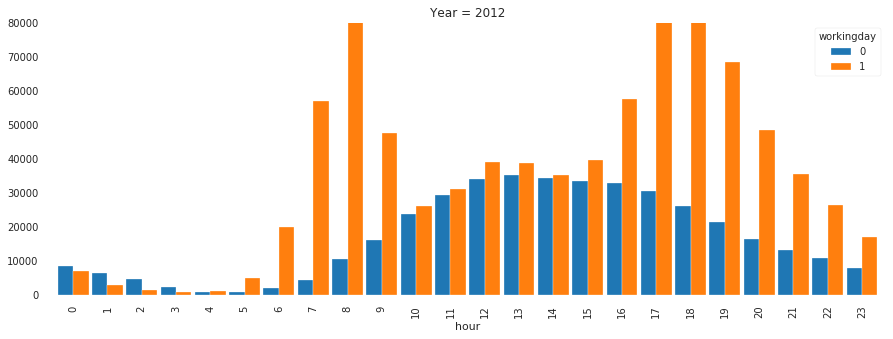

In [42]:
# method for creating the count plot based on hour for a given year 
def plot_by_hour(data, year=None, agg='sum'):
    dd = data
    if year: 
        dd = dd[ dd.datetime.dt.year == year ]
    dd.loc[:, ('hour')] = dd.datetime.dt.hour # extracting the hour data if the year in the data is equal to the year passed as argument
    
    by_hour = dd.groupby(['hour', 'workingday'])['count'].agg(agg).unstack() # groupby hour and working day
    return by_hour.plot(kind='bar', ylim=(0, 80000), figsize=(15,5), width=0.9, title="Year = {0}".format(year)) # returning the figure grouped by hour


plot_by_hour(train, year=2011) # plotting the count plot based on hour for 2011 
plot_by_hour(train, year=2012) # plotting the count plot based on hour for 2012

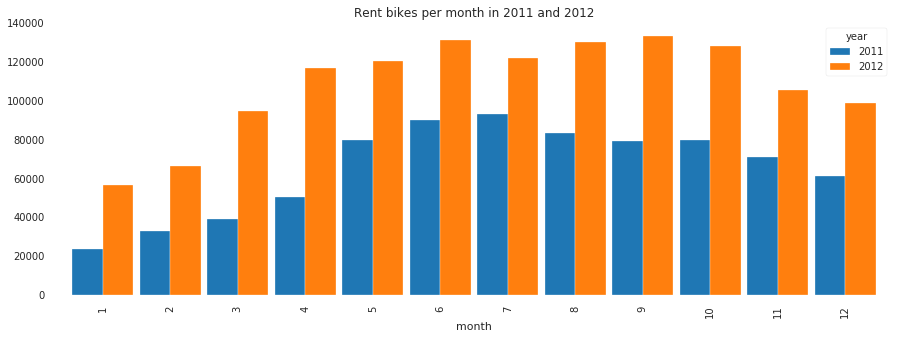

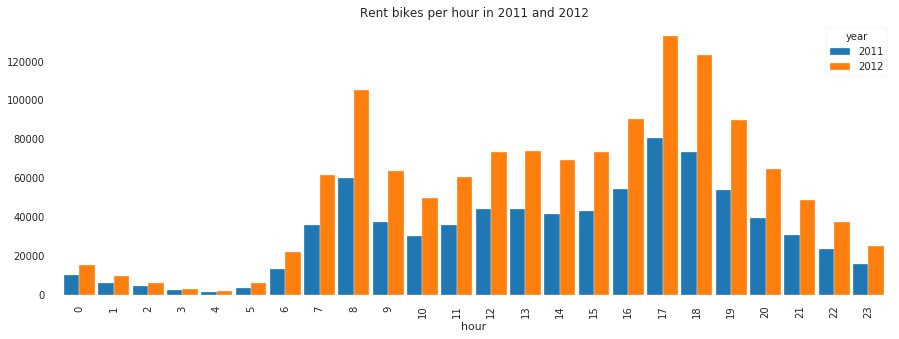

In [43]:
# method for creating the count plot based on year 
def plot_by_year(agg_attr, title):
    # extracting the required fields
    dd = train.copy()
    dd['year'] = train.datetime.dt.year # extratcing the year
    dd['month'] = train.datetime.dt.month # extratcing the month
    dd['hour'] = train.datetime.dt.hour # extratcing the hour
    
    by_year = dd.groupby([agg_attr, 'year'])['count'].agg('sum').unstack() # groupby year
    return by_year.plot(kind='bar', figsize=(15,5), width=0.9, title=title) # returning the figure grouped by year


plot_by_year('month', "Rent bikes per month in 2011 and 2012") # plotting monthly bike rentals based on year
plot_by_year('hour', "Rent bikes per hour in 2011 and 2012") # plotting hourls bike rentals based  on year


In [49]:
# method to plot a graph for count per hour
def plot_hours(data, message = ''):
    dd = data.copy()
    dd['hour'] = data.datetime.dt.hour # extratcing the hour
    
    hours = {}
    for hour in range(24):
        hours[hour] = dd[ dd.hour == hour ]['count'].values

    plt.figure(figsize=(20,10))
    plt.ylabel("Count rent")
    plt.xlabel("Hours")
    plt.title("count vs hours\n" + message)
    plt.boxplot( [hours[hour] for hour in range(24)] )
    
    axis = plt.gca()
    axis.set_ylim([1, 1100])
 

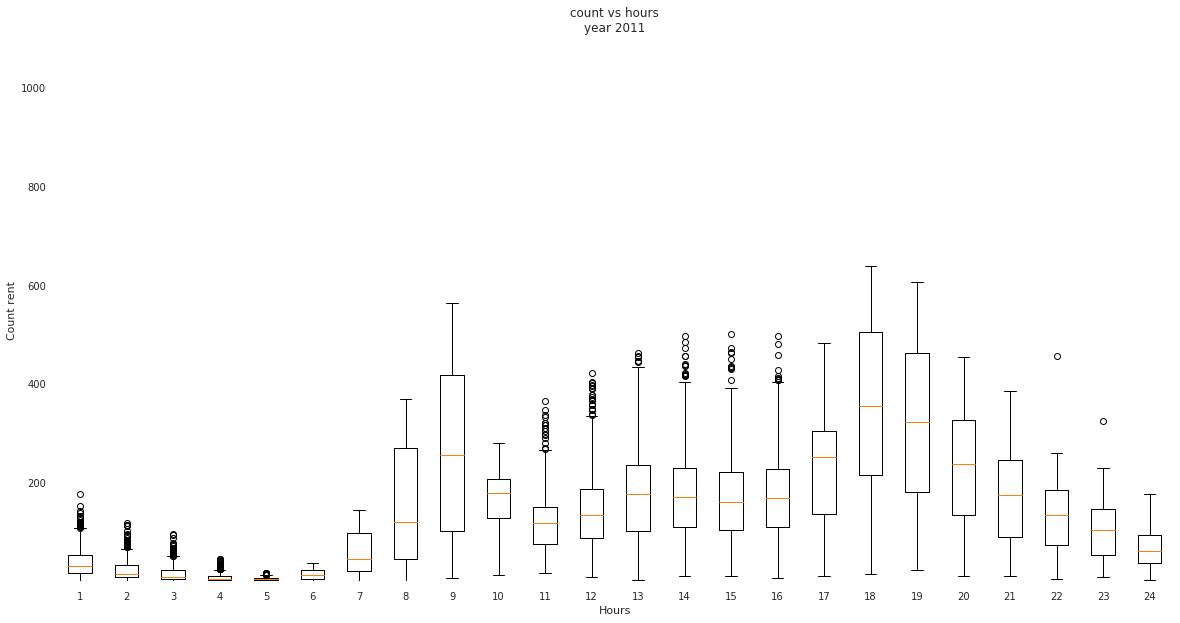

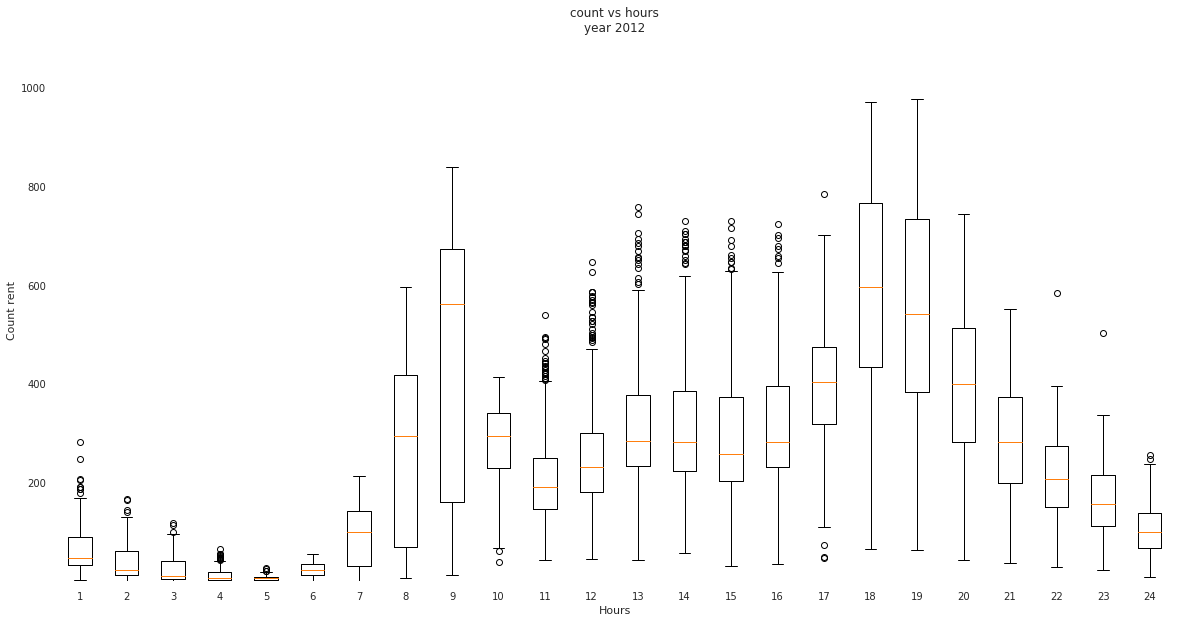

In [50]:
plot_hours( train[train.datetime.dt.year == 2011], 'year 2011') # box plot for hourly count for the mentioned year
plot_hours( train[train.datetime.dt.year == 2012], 'year 2012') # box plot for hourly count for the mentioned year

In [51]:
dt = pd.to_datetime(train["datetime"]) # converting the column to datetime for train dataset
train["hour"] = dt.map(lambda x: x.hour) # adding the hour column for train dataset
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [52]:
dt_test = pd.to_datetime(test["datetime"]) # converting the column to datetime for test dataset
test["hour"] = dt_test.map(lambda x: x.hour) # adding the hour column for test dataset
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,4


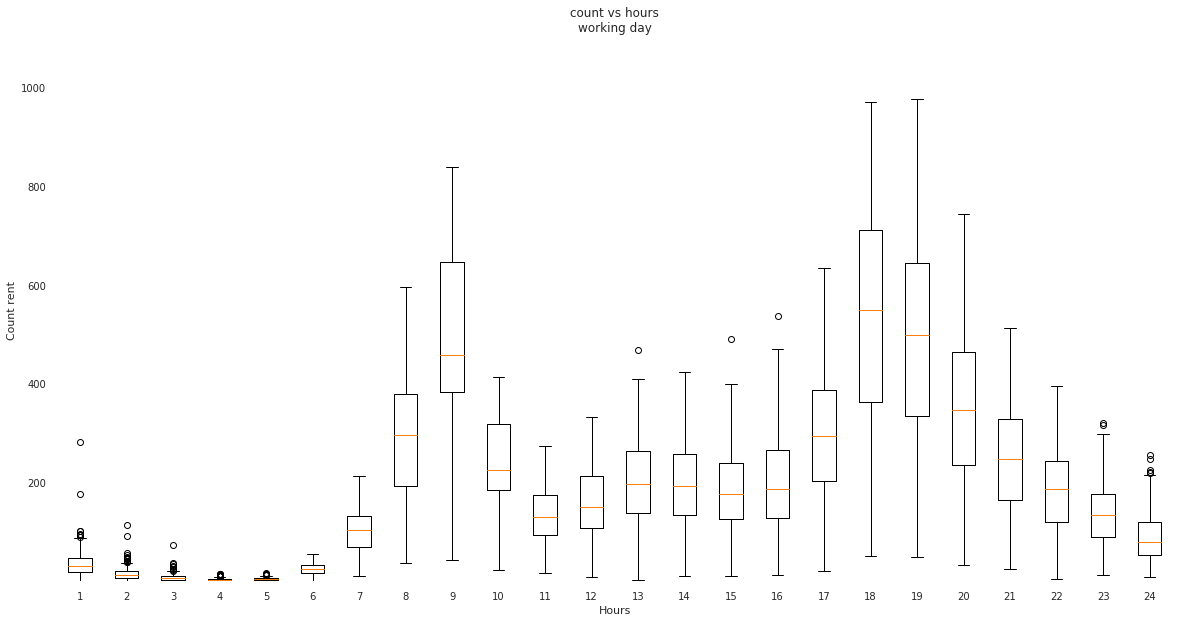

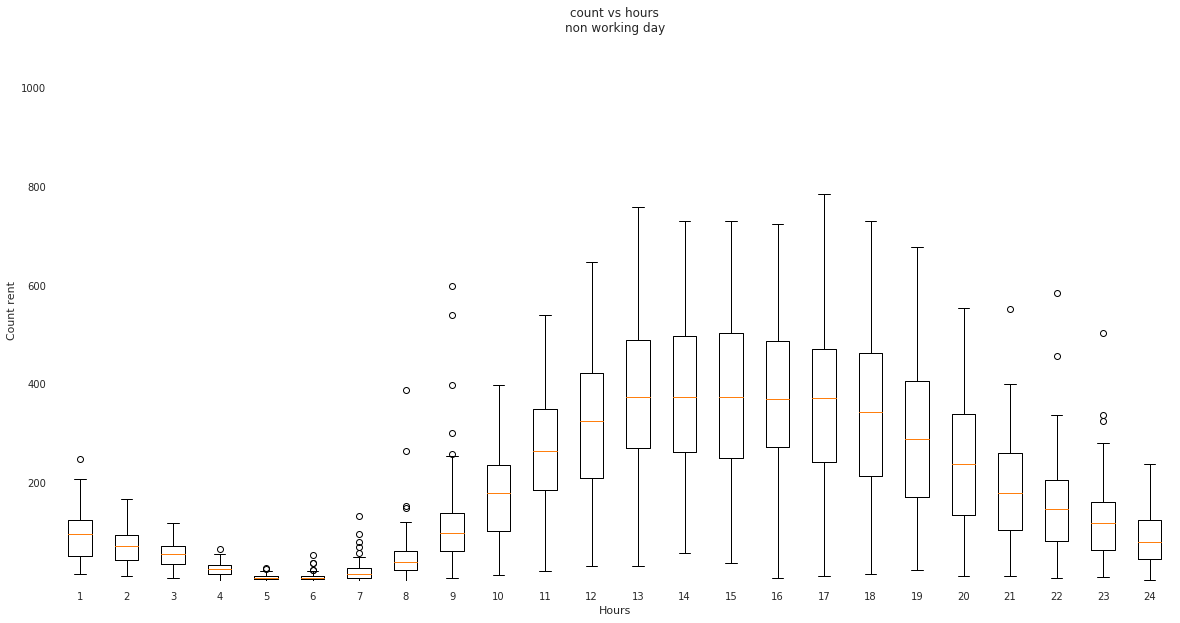

In [53]:

plot_hours( train[train.workingday == 1], 'working day') # plotting hourly count of rented bikes for working days for a given year
plot_hours( train[train.workingday == 0], 'non working day') # plotting hourly count of rented bikes for non-working days for a given year

In [54]:
# method to convert categorical data to numerical data
def categorical_to_numeric(x):
    if 0 <=  x < 6:
        return 0
    elif 6 <= x < 13:
        return 1
    elif 13 <= x < 19:
        return 2
    elif 19 <= x < 24:
        return 3

In [55]:
train['hour'] = train['hour'].apply(categorical_to_numeric)# applying the above conversion logic to training data
train.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,0


In [56]:
test['hour'] = test['hour'].apply(categorical_to_numeric) # applying the above conversion logic to test data
test.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,0


In [58]:
# drop unnecessary columns

train = train.drop(['datetime'], axis=1)
test = test.drop(['datetime'], axis=1)

KeyError: "['datetime'] not found in axis"

In [59]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,0
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,0
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,0
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,0


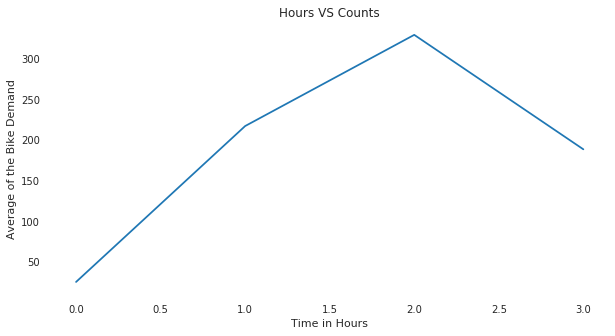

In [60]:
# an Hour bs Count Graph depicting average bike demand based on the hour 
figure,axes = plt.subplots(figsize = (10, 5))
hours = train.groupby(["hour"]).agg("mean")["count"]  
hours.plot(kind="line", ax=axes) 
plt.title('Hours VS Counts')
axes.set_xlabel('Time in Hours')
axes.set_ylabel('Average of the Bike Demand')
plt.show()

In [61]:
# count of different temp values
a = train.groupby('temp')[['count']].mean()
a

,count
temp,
0.82,77.714286
1.64,91.500000
2.46,43.000000
3.28,19.272727
4.10,50.272727
4.92,58.416667
5.74,53.233645
6.56,68.109589
7.38,67.754717


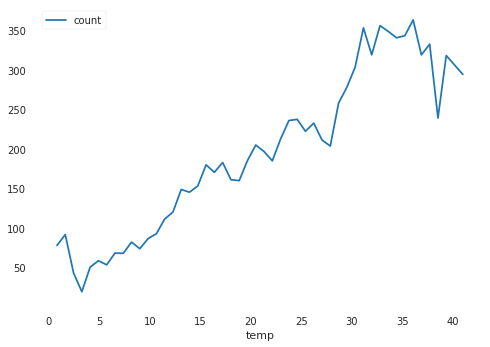

In [62]:
a.plot()
plt.show()

In [63]:
# count of different atemp values
a = train.groupby('atemp')[['count']].mean()
a

,count
atemp,
0.760,1.000000
1.515,3.000000
2.275,38.000000
3.030,82.285714
3.790,39.062500
4.545,66.090909
5.305,63.200000
6.060,64.876712
6.820,56.380952


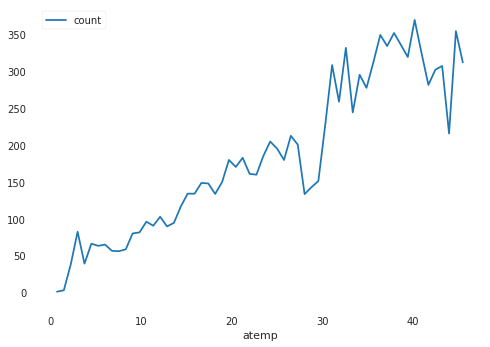

In [64]:
a.plot()
plt.show()

In [65]:
# count based on holiday
a = train.groupby('holiday')[['count']].mean()


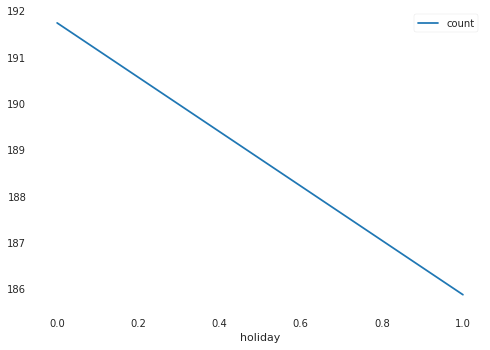

In [66]:
a.plot()
plt.show()

In [67]:
# method to  select the features. If a feature is not in the blaklist, it gets selected
def select_features(data):
    black_list = ['casual', 'registered', 'count', 'is_test', 'datetime', 'count_log']
    return [feat for feat in data.columns if feat not in black_list]


In [46]:
# a method to show results of various model and their predictions
def _simple_modeling(X_train, X_test, y_train, y_test):
    # sepcifying the model names
    models = [
        ('dummy-mean', DummyRegressor(strategy='mean')),
        ('dummy-median', DummyRegressor(strategy='median')),
        ('random-forest', RandomForestRegressor(random_state=0)),
    ]
    
    results = []

    for name, model in models:
        model.fit(X_train, y_train)# fitting the training data to model
        y_pred = model.predict(X_test) # doing predictions using the model
        
        results.append((name, y_test, y_pred)) # creating the list of predictions from various models
        
    return results

# a method to return the performance metric of the model used in the above method
def simple_modeling(X_train, X_test, y_train, y_test):
    results = _simple_modeling(X_train, X_test, y_train, y_test) # using the function defined above to caluclate the predictions
    
    return [ (r[0], rmsle(r[1], r[2]) ) for r in results] # returning the performance metrics


In [68]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
forest_reg = RandomForestRegressor(n_estimators=100) # instantiating the random Forest Regressor

score = cross_val_score(forest_reg, train, train, cv=4) # calcuating the cross validation score
print (score)


/home/akash/anaconda3/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/home/akash/anaconda3/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='unifo

[0.99517407 0.99714011 0.99773592 0.99735369]


/home/akash/anaconda3/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
